In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Asumsikan df adalah DataFrame yang sudah Anda miliki
df = pd.read_csv('F:\Capstone-Project-3\Data\data_california_house.csv')  

# Ubah DataFrame menjadi GeoDataFrame
# 'Point' mengambil dua argumen: longitude dan latitude
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# Baca data batas-batas county (asumsi: 'CA_County.shp' adalah Shapefile dari batas-batas county California)
counties = gpd.read_file("F:\Capstone-Project-3\Data\CA_Counties\CA_Counties_TIGER2016.shp")

# Pastikan data lokasi dan data county memiliki CRS (Coordinate Reference System) yang sama
gdf = gdf.to_crs(counties.crs)

# Gabungkan data
joined = gpd.sjoin(gdf, counties, op='within')

# Ambil hanya kolom dari df asli dan kolom 'NAME' dan 'NAMELSAD'
# columns_to_keep = df.columns.tolist() + ['NAME', 'NAMELSAD']
joined = joined[columns_to_keep]

# joined.to_csv('california_cityandcounty.csv', index=False)

c:\Users\KHANZA\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


NameError: name 'columns_to_keep' is not defined

In [1]:
df.columns

NameError: name 'df' is not defined

In [ ]:
df.media

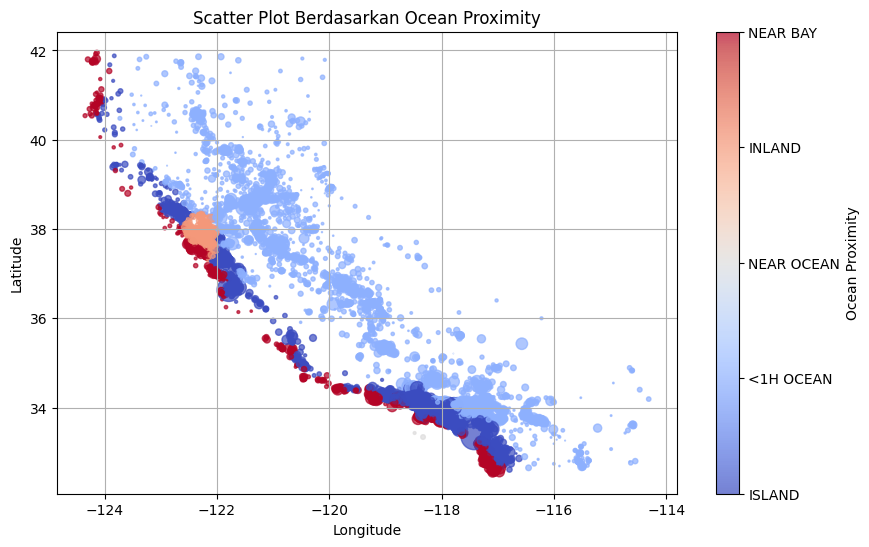

In [52]:
import matplotlib.pyplot as plt
# Assuming df_OceanProximity is a DataFrame containing the unique categories of 'ocean_proximity'
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

plt.figure(figsize=(10, 6))  # Atur ukuran gambar
plt.scatter(df.longitude, df.latitude, c=df.ocean_proximity.cat.codes, cmap='coolwarm', s=df.population/100, alpha=0.7)

# Label sumbu dan judul
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot Berdasarkan Ocean Proximity')

# Colorbar untuk menggambarkan skala ocean_proximity
cbar = plt.colorbar()
cbar.set_ticks(df.ocean_proximity.cat.codes.unique())
cbar.set_ticklabels(df.ocean_proximity.cat.categories) 
cbar.set_label('Ocean Proximity')

plt.grid(True)  
plt.show() 


In [47]:
joined

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,NAME,NAMELSAD
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,Fresno,Fresno County
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,Fresno,Fresno County
25,-120.38,36.76,12.0,932.0,244.0,1043.0,243.0,1.4038,INLAND,54300.0,Fresno,Fresno County
32,-119.83,36.80,24.0,3756.0,681.0,1586.0,739.0,3.8571,INLAND,90100.0,Fresno,Fresno County
58,-119.81,36.71,25.0,1026.0,221.0,789.0,183.0,1.5625,INLAND,52800.0,Fresno,Fresno County
...,...,...,...,...,...,...,...,...,...,...,...,...
5365,-120.24,39.67,40.0,690.0,129.0,305.0,110.0,2.3625,INLAND,62500.0,Sierra,Sierra County
9082,-120.48,39.66,32.0,1516.0,289.0,304.0,131.0,1.8839,INLAND,71000.0,Sierra,Sierra County
9199,-120.23,39.56,14.0,1781.0,346.0,734.0,287.0,2.4600,INLAND,93000.0,Sierra,Sierra County
13753,-120.92,39.56,48.0,1276.0,292.0,358.0,145.0,1.8750,INLAND,66600.0,Sierra,Sierra County


In [41]:
counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,NaN,NaN,NaN,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,NaN,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,NaN,42200,NaN,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,NaN,NaN,NaN,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,NaN,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,31080,31084,A,10510651024,1794730436,+34.1963983,-118.2618616,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."
6,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,NaN,A,4081437574,497508807,+38.5251824,-122.9261095,"POLYGON ((-13685069.767 4623872.832, -13685073..."
7,06,031,00277280,06031,Kings,Kings County,06,H1,G4020,546,25260,NaN,A,3598583450,5468555,+36.0724780,-119.8155301,"POLYGON ((-13353767.857 4335831.239, -13353767..."
8,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,NaN,41740,NaN,A,10895149811,826195031,+33.0236041,-116.7761174,"POLYGON ((-13073075.796 3919158.524, -13074423..."
9,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,NaN,A,3644333049,246486852,+39.0620323,-120.7227181,"POLYGON ((-13476944.153 4722608.150, -13476936..."


In [16]:
gdf.geometry.isna().sum() 


0

In [26]:
from shapely.geometry import Point

# Membuat titik dengan longitude dan latitude yang diberikan
point = Point(-119.79, 36.73)

# Membuat GeoDataFrame baru yang berisi titik ini
point_gdf = gpd.GeoDataFrame(geometry=[point], crs=counties.crs)

# Melakukan operasi spatial untuk menemukan poligon yang berisi titik ini
result = gpd.sjoin(point_gdf, counties, op='within')

# Menampilkan hasil
print(result)


Empty GeoDataFrame
Columns: [geometry, index_right, STATEFP, COUNTYFP, COUNTYNS, GEOID, NAME, NAMELSAD, LSAD, CLASSFP, MTFCC, CSAFP, CBSAFP, METDIVFP, FUNCSTAT, ALAND, AWATER, INTPTLAT, INTPTLON]
Index: []


c:\Users\KHANZA\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [27]:
point_gdf.crs 


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
counties.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

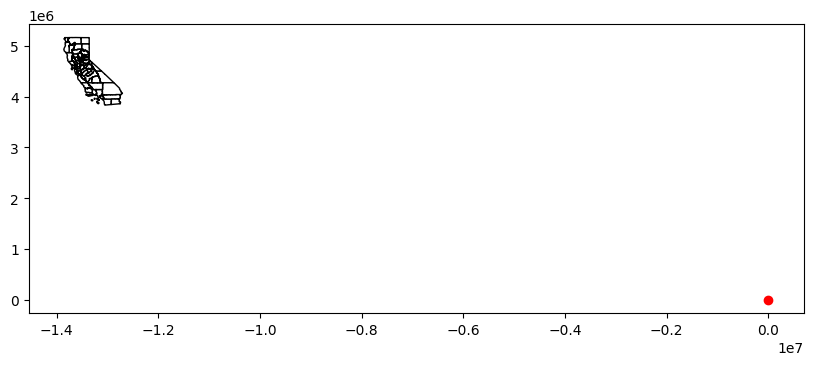

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))  # Menentukan ukuran gambar menjadi 10x10 inci
counties.plot(ax=ax, color='white', edgecolor='black')
point_gdf.plot(ax=ax, color='red')
plt.show()
